# MultiNomialRegression 
 or
# Softmax Regression

In [1]:
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [29]:
from sklearn.datasets import  load_iris
data =load_iris()

In [32]:
df = pd.DataFrame(data.data ,columns=data.feature_names)
df['target'] =data.target

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [38]:
df =df[['sepal length (cm)','petal length (cm)','target']]

In [39]:
X =df.iloc[:,0:2]
Y =df.iloc[:,-1]

In [40]:
X_train ,X_test ,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [41]:
clf =LogisticRegression(multi_class='multinomial')

In [42]:
clf.fit(X_train,Y_train)


C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [45]:
y_pred1 = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix ,precision_score,recall_score,f1_score

In [47]:
print("LogisticRegression")
print("-"*50)
cdf =pd.DataFrame(confusion_matrix(Y_test,y_pred1),columns=list(range(0,3)))
print(cdf)
print("-"*50)
print("accuracy_score",accuracy_score(Y_test,y_pred1))
print("precision_score",precision_score(Y_test,y_pred1,average='macro'))
print("recall_score",recall_score(Y_test,y_pred1,average='macro'))
print('f1_score',f1_score(Y_test,y_pred1,average='macro'))

LogisticRegression
--------------------------------------------------
    0  1  2
0  14  0  0
1   0  7  1
2   0  0  8
--------------------------------------------------
accuracy_score 0.9666666666666667
precision_score 0.9629629629629629
recall_score 0.9583333333333334
f1_score 0.9581699346405229


In [48]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [49]:
from mlxtend.plotting import plot_decision_regions

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


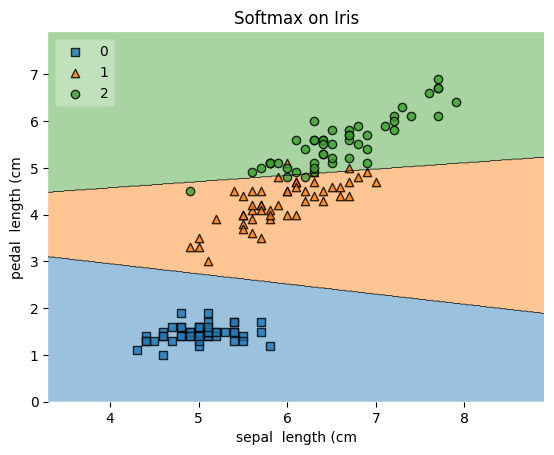

In [50]:
plot_decision_regions(X.values,Y.values,clf,legend =2)

# adding axes annotations
plt.xlabel('sepal  length (cm')
plt.ylabel('pedal  length (cm')
plt.title('Softmax on Iris')

plt.show()

# Using Polynomial Features

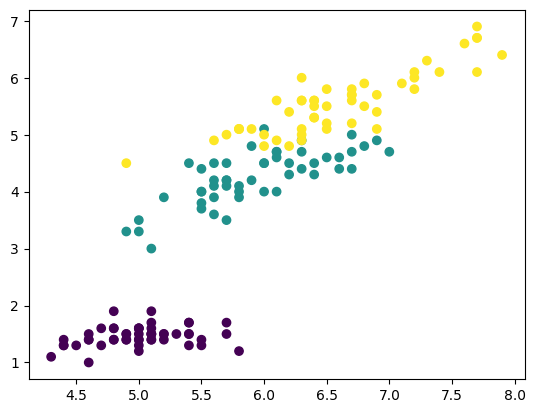

In [85]:
data = pd.read_csv("dataset\\ushape.csv")


X =df.iloc[:,0:2].values
Y =df.iloc[:,-1].values

plt.scatter(X[:,0],X[:,1],c=Y)


In [86]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial')

In [87]:
clf.fit(X,Y)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

<Axes: >

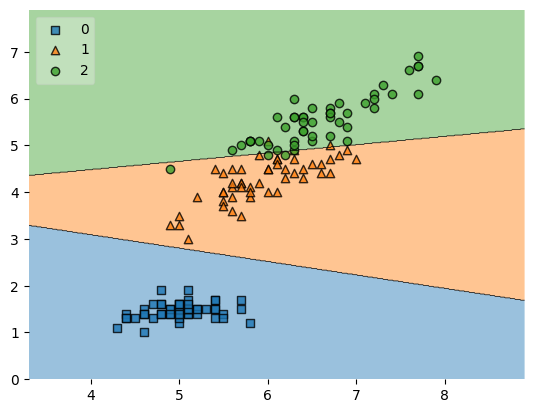

In [89]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, Y.astype('int'), clf, legend=2)

In [91]:

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,Y,scoring='accuracy',cv=10))

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\

0.9600000000000002

In [92]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [93]:

clf1 = LogisticRegression(multi_class='multinomial')
np.mean(cross_val_score(clf1,X_trf,Y,scoring='accuracy',cv=10))

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alt

0.9466666666666667

In [95]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

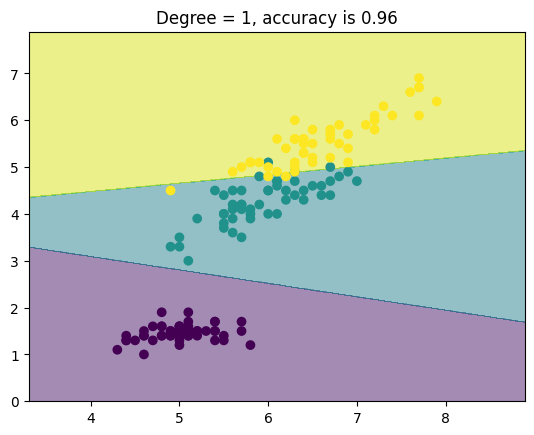

In [96]:
plot_decision_boundary(X,Y)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

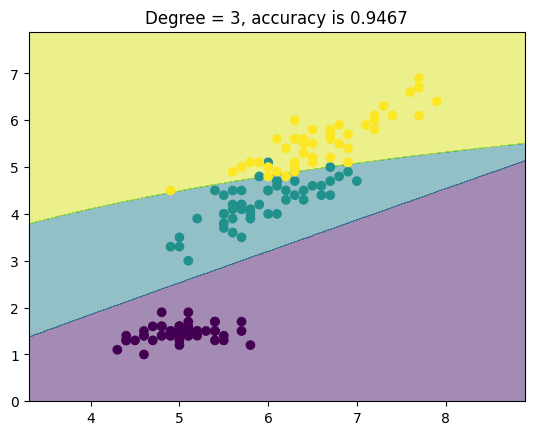

In [97]:
plot_decision_boundary(X,Y,degree=3)

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

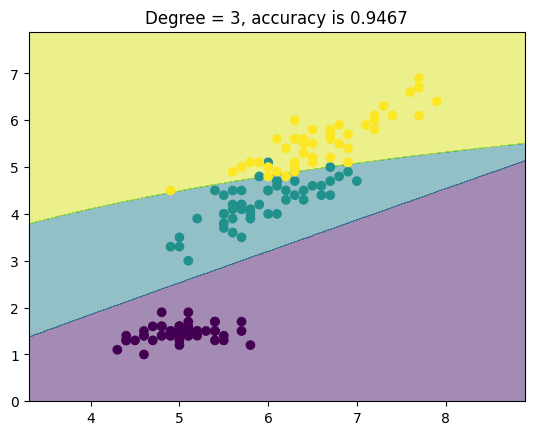

In [99]:
plot_decision_boundary(X,Y,degree=3)